In [167]:
# DESAFIO DE MERCADO - REGRESSÃO
# IMPORTAÇÃO DE BOBLIOTECAS

In [168]:
#import pandas as pd


In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib
import plotly.express as px
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from category_encoders.target_encoder import TargetEncoder



import warnings

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
warnings.filterwarnings("ignore")

In [170]:
# CONFIGURANDO GRAFICOS

In [171]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20,8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [172]:
#Lendo o DataSet

In [173]:
df = pd.read_csv(r'C:\Users\Luiz Philipe Rangel\Desktop\TERA - AULAS\DESAFIO DE MERCADO - REGRESSÃO\base.csv')

In [174]:
#Visualizando as variáveis

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

In [176]:
#transformando pes quadrados em metros quadrados

In [177]:
df['TamanhoLote'] = df['TamanhoLote'] * 0.093
df['AreaConstruida'] = df['AreaConstruida'] * 0.093
df['AreaPiscina'] = df['AreaPiscina'] * 0.093

In [178]:
# Somando para uma nova coluna o numero total de banheiros e lavabos

In [179]:
df['TotalBanheiros'] = df['Banheiro'] + df['BanheiroPorao']
df['TotalLavabos'] = df['Lavabo'] + df['LavaboPorao']

In [180]:
#Transformação de variável para category

In [323]:
df['Condicao'] = df['Condicao'].astype('category')
df['Bairro'] = df['Bairro'].astype('category')
df['Estrada1'] = df['Estrada1'].astype('category')
df['Estrada2'] = df['Estrada2'].astype('category')
df['Qualidade'] = df['Qualidade'].astype('category')

In [324]:


#Verificando campos nulos

In [325]:
df.isna().sum()

Id                         0
ClasseImovel               0
ClasseZona                 0
Fachada                  259
TamanhoLote                0
Rua                        0
Beco                    1369
FormaProp                  0
PlanoProp                  0
Servicos                   0
ConfigLote                 0
InclinacaoLote             0
Bairro                     0
Estrada1                   0
Estrada2                   0
TipoHabitacao              0
EstiloHabitacao            0
Qualidade                  0
Condicao                   0
AnoConstrucao              0
AnoReforma                 0
TipoTelhado                0
MaterialTelhado            0
Exterior1                  0
Exterior2                  0
TipoAlvenaria              8
AreaAlvenaria              8
QualidadeCobertura         0
CondicaoExterna            0
TipoFundacao               0
AlturaPorao               37
CondicaoPorao             37
ParedePorao               38
TipoAcabPorao1            37
AreaAcabPorao1

In [326]:
df.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda,TotalBanheiros,TotalLavabos
0,1,60,RL,65.0,785.85,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,159.030,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0.0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3,1
1,2,20,RL,80.0,892.80,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,117.366,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0.0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2,1
2,3,60,RL,68.0,1046.25,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,166.098,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0.0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3,1
3,4,70,RL,60.0,888.15,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,159.681,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0.0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2,0
4,5,60,RL,84.0,1326.18,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,204.414,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0.0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3,1


In [327]:
# Primeira seleção de variáveis a partir de conversa com um Corretor de imoveis

In [393]:
df2 = df[['TamanhoLote','Condicao','Qualidade','AnoConstrucao','AnoReforma','Bairro','Estrada1','Estrada2','AreaConstruida','TotalQuartos','KitchenAbvGr','TotalBanheiros','TotalLavabos','CarrosGaragem','AreaPiscina','ArCentral','PrecoVenda']]

In [394]:
df2

,TamanhoLote,Condicao,Qualidade,AnoConstrucao,AnoReforma,Bairro,Estrada1,Estrada2,AreaConstruida,TotalQuartos,KitchenAbvGr,TotalBanheiros,TotalLavabos,CarrosGaragem,AreaPiscina,ArCentral,PrecoVenda
0,785.850,5,7,2003,2003,CollgCr,Norm,Norm,159.030,8,1,3,1,2,0.0,Y,208500
1,892.800,8,6,1976,1976,Veenker,Feedr,Norm,117.366,6,1,2,1,2,0.0,Y,181500
2,1046.250,5,7,2001,2002,CollgCr,Norm,Norm,166.098,6,1,3,1,2,0.0,Y,223500
3,888.150,5,7,1915,1970,Crawfor,Norm,Norm,159.681,7,1,2,0,3,0.0,Y,140000
4,1326.180,5,8,2000,2000,NoRidge,Norm,Norm,204.414,9,1,3,1,3,0.0,Y,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,736.281,5,6,1999,2000,Gilbert,Norm,Norm,153.171,7,1,2,1,2,0.0,Y,175000
1456,1225.275,6,6,1978,1988,NWAmes,Norm,Norm,192.789,7,1,3,0,2,0.0,Y,210000
1457,840.906,9,7,1941,2006,Crawfor,Norm,Norm,217.620,9,1,2,0,1,0.0,Y,266500
1458,903.681,6,5,1950,1996,NAmes,Norm,Norm,100.254,5,1,2,0,1,0.0,Y,142125


In [395]:
# Vizualização de df2

In [396]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   TamanhoLote     1460 non-null   float64 
 1   Condicao        1460 non-null   category
 2   Qualidade       1460 non-null   category
 3   AnoConstrucao   1460 non-null   int64   
 4   AnoReforma      1460 non-null   int64   
 5   Bairro          1460 non-null   category
 6   Estrada1        1460 non-null   category
 7   Estrada2        1460 non-null   category
 8   AreaConstruida  1460 non-null   float64 
 9   TotalQuartos    1460 non-null   int64   
 10  KitchenAbvGr    1460 non-null   int64   
 11  TotalBanheiros  1460 non-null   int64   
 12  TotalLavabos    1460 non-null   int64   
 13  CarrosGaragem   1460 non-null   int64   
 14  AreaPiscina     1460 non-null   float64 
 15  ArCentral       1460 non-null   object  
 16  PrecoVenda      1460 non-null   int64   
dtypes: category(5)

In [397]:
#verificando nulos das variáveis selecionadas

In [398]:
df2.isna().sum()

TamanhoLote       0
Condicao          0
Qualidade         0
AnoConstrucao     0
AnoReforma        0
Bairro            0
Estrada1          0
Estrada2          0
AreaConstruida    0
TotalQuartos      0
KitchenAbvGr      0
TotalBanheiros    0
TotalLavabos      0
CarrosGaragem     0
AreaPiscina       0
ArCentral         0
PrecoVenda        0
dtype: int64

In [399]:
#Visualizando relação entre Precovenda e AreaConstruida

<AxesSubplot:xlabel='AreaConstruida', ylabel='PrecoVenda'>

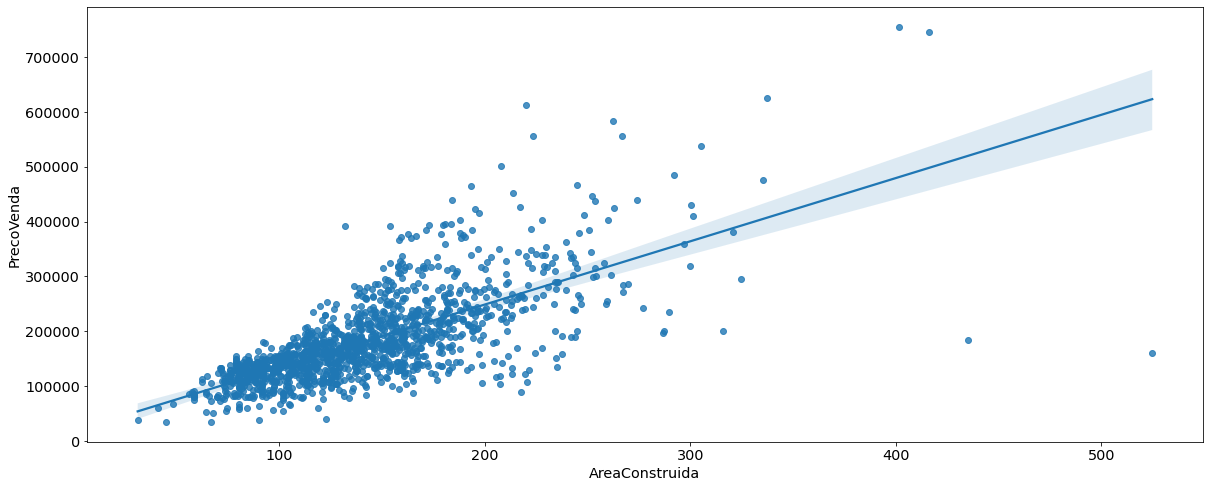

In [400]:
sns.regplot(x='AreaConstruida',y='PrecoVenda',data=df2)

In [401]:
#Distribuição da quantidade de quartos

<AxesSubplot:xlabel='TotalQuartos', ylabel='count'>

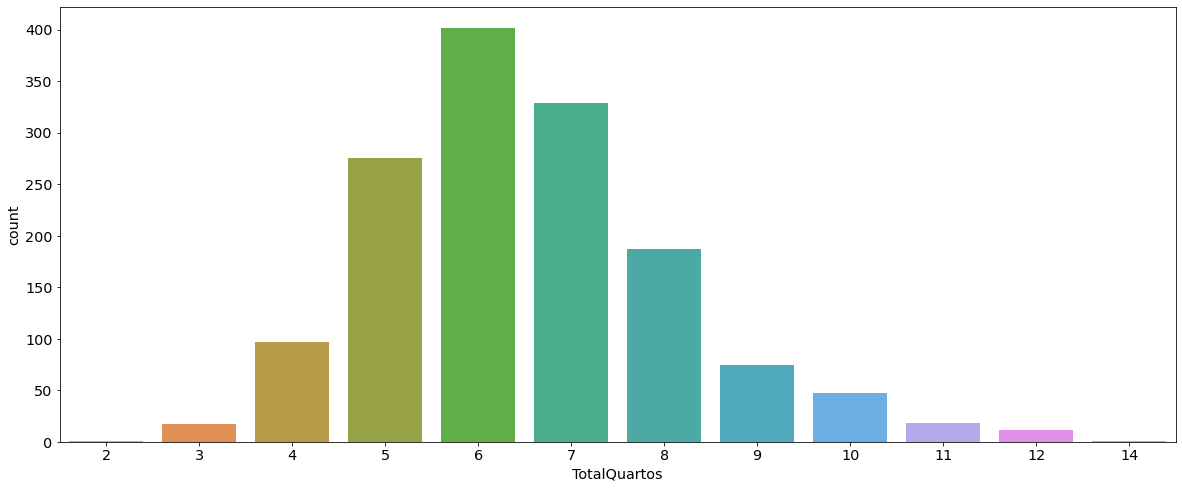

In [402]:
sns.countplot(df2['TotalQuartos'])

<AxesSubplot:xlabel='TotalBanheiros', ylabel='count'>

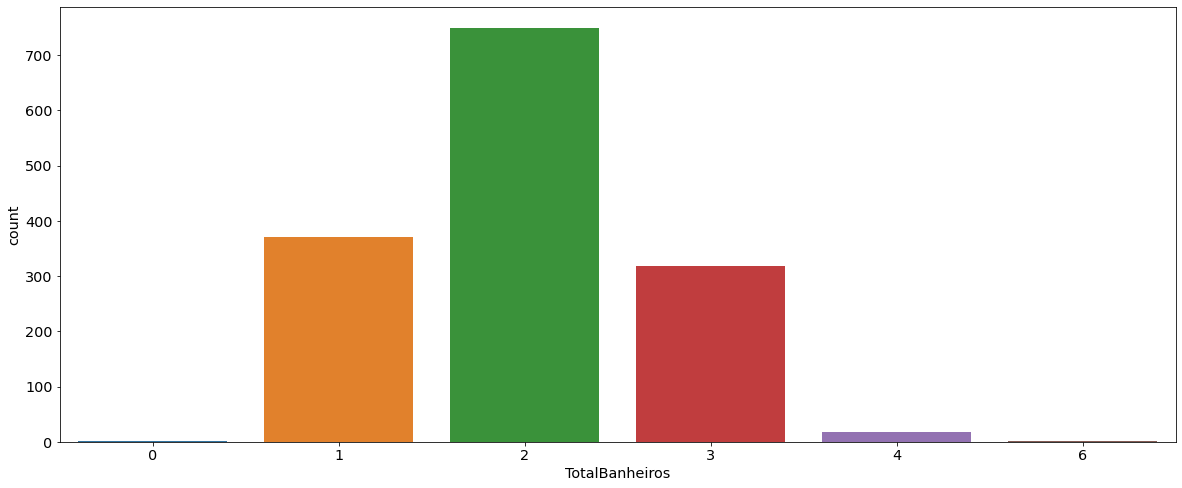

In [403]:
sns.countplot(df['TotalBanheiros'])

In [404]:
#Relação entre variável categorica Condicao e númerica PrecoVenda

<AxesSubplot:xlabel='Condicao', ylabel='PrecoVenda'>

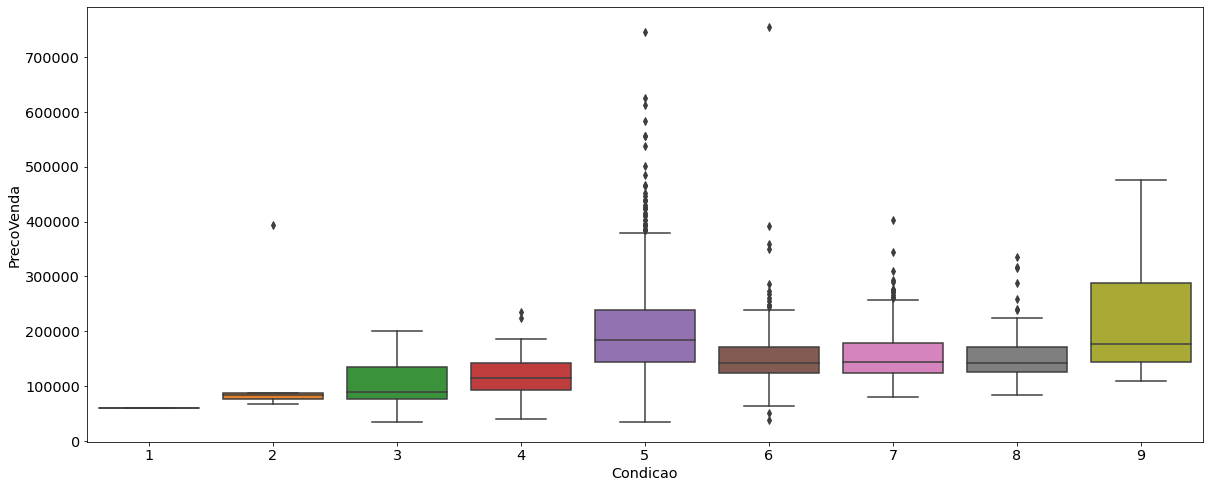

In [406]:
sns.boxplot(x='Condicao',y='PrecoVenda',data=df2)

In [407]:
#Relação entre a variável categórica Bairro e PrecoVenda




<AxesSubplot:xlabel='Bairro', ylabel='PrecoVenda'>

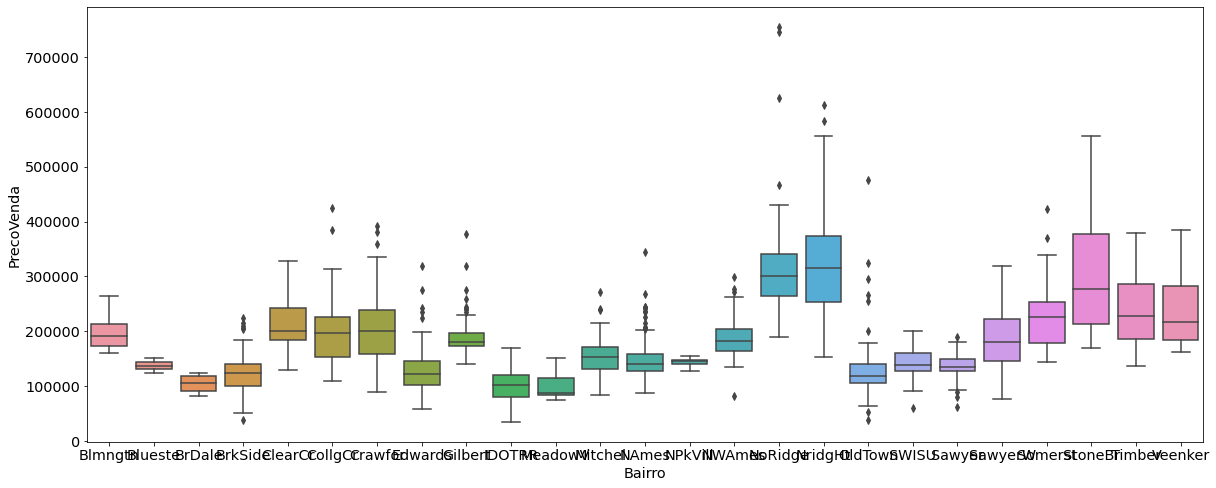

In [408]:
sns.boxplot(x='Bairro',y='PrecoVenda',data=df2)

In [409]:
#Plotando correlação entre variaveis

<AxesSubplot:>

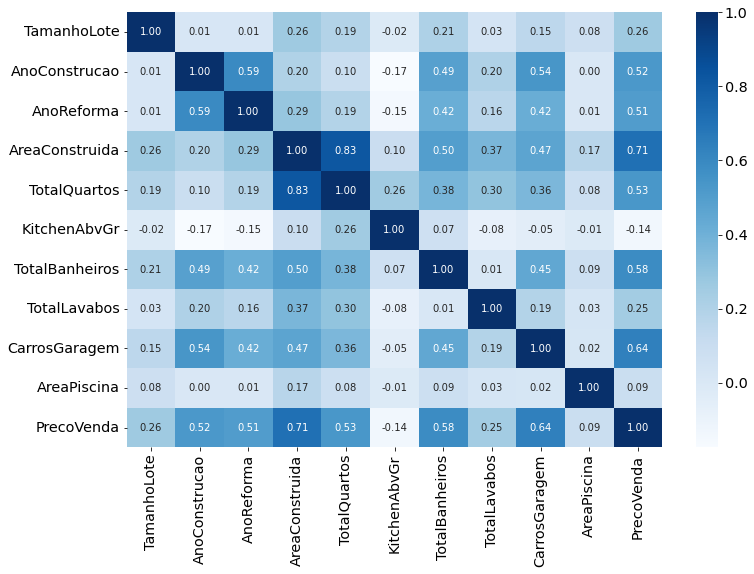

In [410]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,cmap='Blues',fmt='.2f')

In [411]:
# Criando novas variáveis a partir de ano de construção e refornma

In [414]:
df2['IdadeDoImovel'] = 2022 - df2['AnoConstrucao']
df2['UltimaReforma'] = np.where(df2['AnoReforma']==0, 2022 - df2['AnoConstrucao'], 2022 - df2['AnoReforma'])
df2['PrecoVenda_log'] = np.log(df2.PrecoVenda)  
Condicao_enc = TargetEncoder()
Bairro_enc = TargetEncoder()
Qualidade_enc = TargetEncoder()
ArCentral_enc = TargetEncoder()
df2['Condicao_encoder'] = Condicao_enc.fit_transform(X=df2.Condicao, y=df2.PrecoVenda_log)
df2['Bairro_encoder'] = Bairro_enc.fit_transform(X=df2.Bairro, y=df2.PrecoVenda_log)
df2['Qualidade_encoder'] = Qualidade_enc.fit_transform(X=df2.Qualidade, y=df2.PrecoVenda_log)
df2['ArCentral_encoder'] = ArCentral_enc.fit_transform(X=df2.ArCentral, y=df2.PrecoVenda_log)


In [415]:
df2.head()

,TamanhoLote,Condicao,Qualidade,AnoConstrucao,AnoReforma,Bairro,Estrada1,Estrada2,AreaConstruida,TotalQuartos,KitchenAbvGr,TotalBanheiros,TotalLavabos,CarrosGaragem,AreaPiscina,ArCentral,PrecoVenda,IdadeDoImovel,UltimaReforma,PrecoVenda_log,Condicao_encoder,Bairro_encoder,Qualidade_encoder,ArCentral_encoder
0,785.85,5,7,2003,2003,CollgCr,Norm,Norm,159.030,8,1,3,1,2,0.0,Y,208500,19,19,12.247694,12.144178,12.163641,12.221773,12.06109
1,892.80,8,6,1976,1976,Veenker,Feedr,Norm,117.366,6,1,2,1,2,0.0,Y,181500,46,46,12.109011,11.909391,12.344161,11.967308,12.06109
2,1046.25,5,7,2001,2002,CollgCr,Norm,Norm,166.098,6,1,3,1,2,0.0,Y,223500,21,20,12.317167,12.144178,12.163641,12.221773,12.06109
3,888.15,5,7,1915,1970,Crawfor,Norm,Norm,159.681,7,1,2,0,3,0.0,Y,140000,107,52,11.849398,12.144178,12.206659,12.221773,12.06109
4,1326.18,5,8,2000,2000,NoRidge,Norm,Norm,204.414,9,1,3,1,3,0.0,Y,250000,22,22,12.429216,12.144178,12.676000,12.497191,12.06109


In [416]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   TamanhoLote        1460 non-null   float64 
 1   Condicao           1460 non-null   category
 2   Qualidade          1460 non-null   category
 3   AnoConstrucao      1460 non-null   int64   
 4   AnoReforma         1460 non-null   int64   
 5   Bairro             1460 non-null   category
 6   Estrada1           1460 non-null   category
 7   Estrada2           1460 non-null   category
 8   AreaConstruida     1460 non-null   float64 
 9   TotalQuartos       1460 non-null   int64   
 10  KitchenAbvGr       1460 non-null   int64   
 11  TotalBanheiros     1460 non-null   int64   
 12  TotalLavabos       1460 non-null   int64   
 13  CarrosGaragem      1460 non-null   int64   
 14  AreaPiscina        1460 non-null   float64 
 15  ArCentral          1460 non-null   object  
 16  PrecoV

<AxesSubplot:>

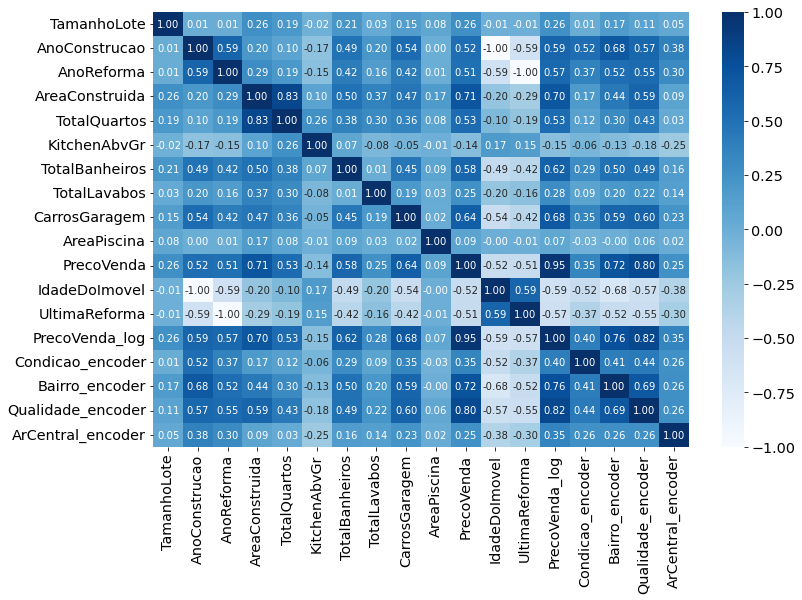

In [417]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(),annot=True,cmap='Blues',fmt='.2f')

In [418]:
#Distribuição dos Precovenda_log

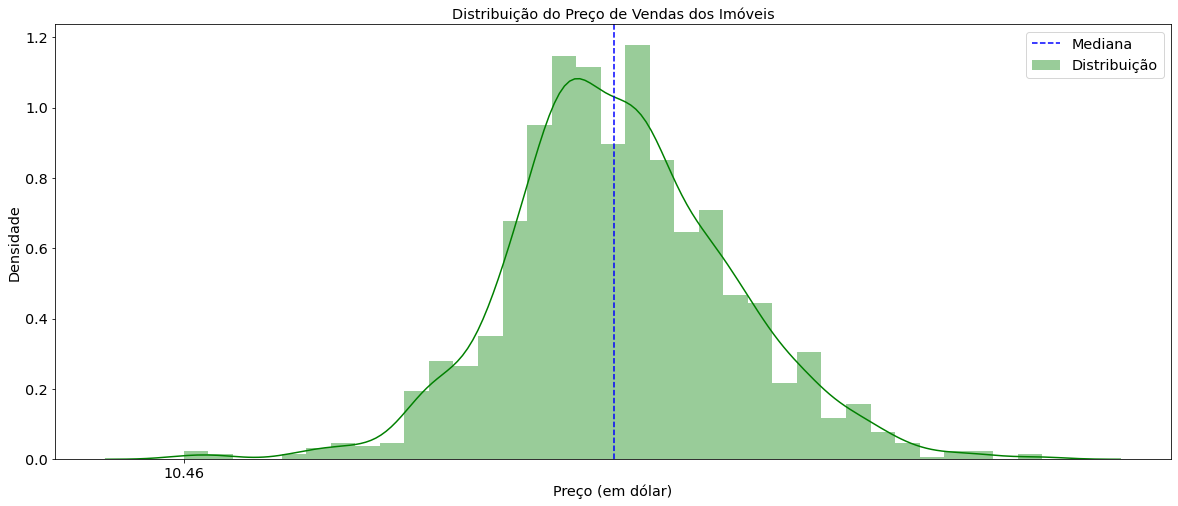

In [419]:
MedPrice = df2['PrecoVenda_log'].median()

plt.figure(figsize=[20, 8])
sns.distplot(df2['PrecoVenda_log'], color = 'green', label = 'Distribuição')
plt.axvline(MedPrice, color='b', linestyle='dashed', label='Mediana')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribuição do Preço de Vendas dos Imóveis')
plt.xlabel('Preço (em dólar)')
plt.ylabel('Densidade')
plt.xticks(np.arange(df2['PrecoVenda_log'].min(), df2['PrecoVenda_log'].max(), step=500))

plt.legend()
plt.show()

In [263]:
#Regressão com uma variável categorica  - Condicao

In [468]:
regressao = smf.ols ('PrecoVenda_log ~ AreaConstruida + Bairro_encoder + Qualidade_encoder + ArCentral_encoder + TotalBanheiros + CarrosGaragem',  data = df2).fit()

In [469]:
# Visualizando sumário da regressão

In [470]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:         PrecoVenda_log   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1322.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        16:29:35   Log-Likelihood:                 630.30
No. Observations:                1460   AIC:                            -1247.
Df Residuals:                    1453   BIC:                            -1210.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.4493      0.40

In [436]:
#Avaliando os Betas 

In [538]:
pd.DataFrame(regressao.params, columns=['betas'])*100


,betas
Intercept,-144.926281
AreaConstruida,0.221504
Bairro_encoder,32.332501
Qualidade_encoder,38.647117
ArCentral_encoder,36.305137
TotalBanheiros,6.583148
CarrosGaragem,7.345998


In [ ]:
# Então: Interpretação dos coeficientes:

AreaConstruida 0.02% (Aumento de 1 unidade da AreaConstruida aumenta em 0.02% o preço do imóvel)
Bairro 32.3% ( dependendo do Bairro o preço do imóvel aumenta em 32.3%)
Qualidade 38.6% (Para cada aumento do nível de qualidade, indo de 1-muito ruim até 10-Muito excelente, aumenta em % o preço do imóvel)
ArCentral_Y 36.3% (Presença de ar condicionado central aumenta 36.38% o valor do imóvel)
Total Banheiros 6.5% (Aumento de 1 unidade de Banheiros aumenta em 6.5% o preço do imóvel)
Carros na garagem 7.3% (Aumento de 1 unidade de Carros na garagem aumenta em 7.3% o preço do imóvel)

In [438]:
#Verificando os residos da regressão e sua normalidadde

In [439]:
print(regressao.resid)

0      -0.034683
1       0.024729
2       0.019133
3      -0.455959
4      -0.299249
          ...   
1455   -0.030149
1456    0.006731
1457    0.206355
1458    0.117620
1459    0.168425
Length: 1460, dtype: float64


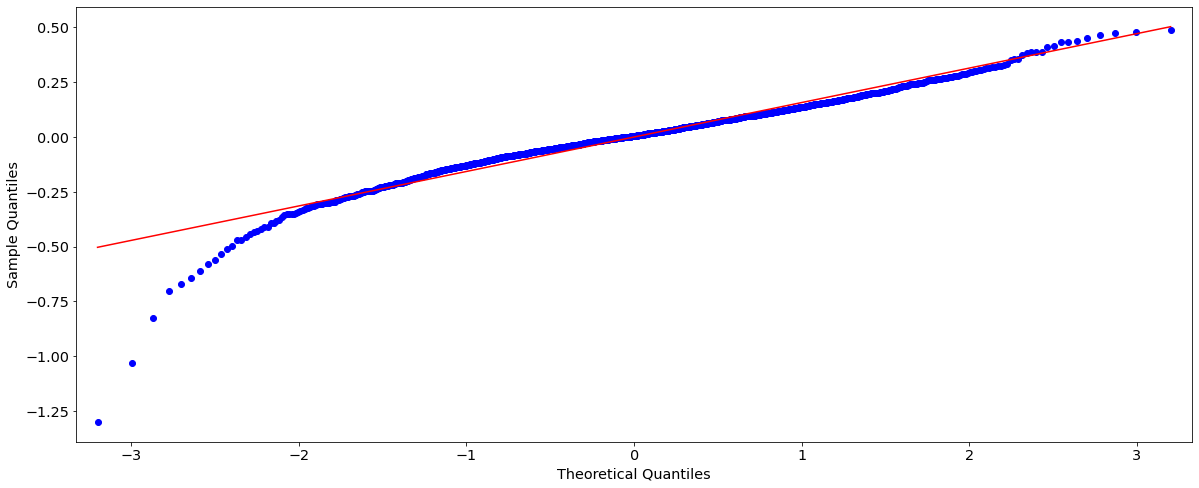

In [440]:
res = regressao.resid 
fig = sm.qqplot(res, line='s')
plt.show()

In [441]:
#teste estatístico para verificar a normalidade dos residos

In [442]:
scipy.stats.jarque_bera(regressao.resid)

Jarque_beraResult(statistic=2279.6388965412903, pvalue=0.0)

In [443]:
#Os resídos não estão em uma distribuição normal - Heavy-Tailed

In [444]:
#Fazendo teste para verificar homocedasticidade - Teste de Breusch Pagan

In [445]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [446]:
bp_test = het_breuschpagan(regressao.resid,regressao.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 134.96669150804593, 'LM-Test p-value': 1.1550156083833692e-26, 'F-Statistic': 24.666877114757657, 'F-Test p-value': 5.782520812644171e-28}


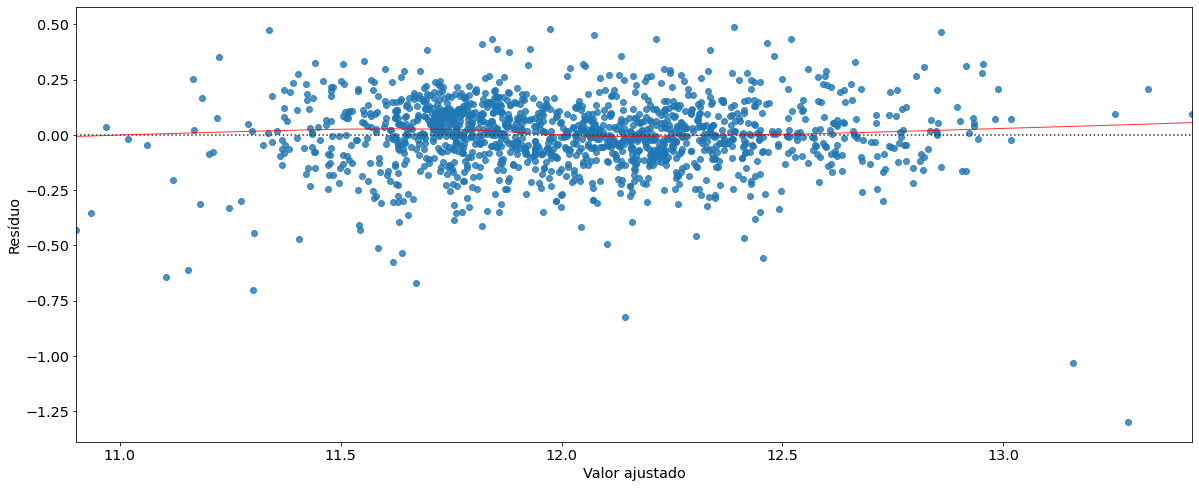

In [447]:
# GRÁFICO PARA LINEARIDADE E HOMOCEDASTICIDADE #

modelo_residuo = regressao.resid
modelo_y_ajustado = regressao.fittedvalues

sns.residplot(modelo_y_ajustado, modelo_residuo, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()



In [288]:
# Separando dados de treino e teste

In [452]:

X = df2[['AreaConstruida','Bairro_encoder', 'ArCentral_encoder','TotalBanheiros','CarrosGaragem', 'Qualidade_encoder']]
X = sm.add_constant(X)

y = df2['PrecoVenda_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PrecoVenda_log   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1010.
Date:                Sat, 21 May 2022   Prob (F-statistic):               0.00
Time:                        16:09:49   Log-Likelihood:                 508.66
No. Observations:                1168   AIC:                            -1003.
Df Residuals:                    1161   BIC:                            -967.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1817      0.435     -2.717      0.007      -2.035      -0.328
AreaConstruida        0.0022      0.000     17.412      0.000       0.002       0.002
Bairro_encoder        0.3049      0.023     13.421      0.000       0.260       0.349
ArCentral_encoder     0.3664      0.033     11.049      0.000       0.301       0.431
TotalBanheiros        0.0670      0.008      8.581      0.000       0.052       0.082
CarrosGaragem         0.0791      0.008      9.502      0.000       0.063       0.095
Qualidade_encoder     0.3791      0.023     16.763      0.000       0.335       0.423
==============================================================================
Omnibus:                      326.409   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2327.689
Skew:                          -1.095   Prob(JB):                         0.00
Kurtosis:                       9.560   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [453]:
#-- aplicando lasso
model = Lasso(alpha=1, max_iter=100, random_state=42)
model.fit(X= X_train, y=y_train)

Lasso(alpha=1, max_iter=100, random_state=42)

In [454]:
#-- avaliação do modelo sobre a massa de treino
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mse_tr = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
r2_tr = r2_score(y_true=y_train, y_pred=model.predict(X_train))

In [455]:
#-- avaliação do modelo sobre a massa de teste
mse_te = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
r2_te = r2_score(y_true=y_test, y_pred=model.predict(X_test))

In [456]:
#-- Tabela com os resultados
pd.DataFrame(
    index=["train", "test"],
    columns=["MSE", "R^2"],
    data=[
        [mse_tr, r2_tr],
        [mse_te, r2_te]
    ]
)

,MSE,R^2
train,0.080494,0.471977
test,0.088360,0.526507


In [457]:
#-- printando os coeficientes
model.coef_

array([0.        , 0.00509742, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [458]:
#-- importando lib
import joblib

In [459]:
#-- exportando modelo
joblib_file = 'lasso_model.pkl'
joblib.dump(model, joblib_file)

['lasso_model.pkl']

In [460]:
#-- aplicando Ridge
model = Ridge(alpha=1, max_iter=100, random_state=42)
model.fit(X=X_train, y=y_train)

Ridge(alpha=1, max_iter=100, random_state=42)

In [461]:
# avaliação do modelo sobre a massa de treino
mse_tr = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
r2_tr = r2_score(y_true=y_train, y_pred=model.predict(X_train))

In [462]:
#-- avaliação do modelo sobre a massa de teste
mse_te = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
r2_te = r2_score(y_true=y_test, y_pred=model.predict(X_test))

In [463]:
#-- Tabela com os resultados
pd.DataFrame(
    index=["train", "test"],
    columns=["MSE", "R^2"],
    data=[
        [mse_tr, r2_tr],
        [mse_te, r2_te]
    ]
)

,MSE,R^2
train,0.024511,0.839215
test,0.025748,0.862025


In [ ]:
# Observação: Utilizando O Ridge consegui o R^2 acima de 0,85 no teste

In [ ]:
# Regressão via random forest para predição

In [ ]:
#Importando as Bibliotecas que faltaram para o Random Forest

In [509]:

import math

# Modelling libs

from typing import List, Tuple
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split 

# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

from matplotlib.dates import DateFormatter

sns.set(font_scale=1.2, style="whitegrid")

In [510]:
# Variavel de interesse
target = 'PrecoVenda'
print('target:', target)

# Variaveis numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove('ClasseImovel')
num_vars.remove(target)
print(f'numerical vars({len(num_vars)}): {num_vars}')

# Variaveis categorical
cat_vars = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
cat_vars.append('ClasseImovel')
print(f'categorical vars({len(cat_vars)}): {cat_vars}')

target: PrecoVenda
numerical vars(36): ['Id', 'Fachada', 'TamanhoLote', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda', 'TotalBanheiros', 'TotalLavabos']
categorical vars(46): ['ClasseZona', 'Rua', 'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'Qualidade', 'Condicao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'Tip

In [511]:
#Função para criar Datasets de Treino, validação e teste
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report


In [512]:
#Separando dados em treino e teste

In [513]:
features = num_vars + cat_vars
# TO-DO rever essa parte
# features = [feature for feature in features if feature not in features_to_remove]

(
  X_train, X_test, 
  X_val, y_train, 
  y_test, y_val
) = train_test_valid_split(df, features=features, target=target, test_size=0.3, valid_size=0.5, random_state=42)

print('X Train shape', X_train.shape)
print('X Val shape', X_val.shape)
print('X Test shape', X_test.shape)

X Train shape (1022, 82)
X Val shape (219, 82)
X Test shape (219, 82)


In [514]:
#Pre-processamento dos datasets de treino, teste e validação

In [515]:
def random_forest_preprocessing(X_train, X_val, X_test, y_train):

  # Categoricals pre-processing (missing imputer)
  cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  X_train[cat_vars] = cat_imputer.fit_transform(X_train[cat_vars])
  X_val[cat_vars] = cat_imputer.transform(X_val[cat_vars])
  X_test[cat_vars] = cat_imputer.transform(X_test[cat_vars])

  # Categoricals pre-processing (missing imputer)
  cat_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
  X_train[cat_vars] = cat_imputer.fit_transform(X_train[cat_vars])
  X_val[cat_vars] = cat_imputer.transform(X_val[cat_vars])
  X_test[cat_vars] = cat_imputer.transform(X_test[cat_vars])

  # Categoricals pre-processing (categorical encoders)
  target_encoder = TargetEncoder()
  X_train[cat_vars] = target_encoder.fit_transform(X_train[cat_vars], y_train)
  X_val[cat_vars] = target_encoder.transform(X_val[cat_vars])
  X_test[cat_vars] = target_encoder.transform(X_test[cat_vars])

  # Numerical pre-processing (missing imputer)
  num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
  X_train[num_vars] = num_imputer.fit_transform(X_train[num_vars])
  X_val[num_vars] = num_imputer.transform(X_val[num_vars])
  X_test[num_vars] = num_imputer.transform(X_test[num_vars])

  return X_train, X_val, X_test

X_train, X_val, X_test = random_forest_preprocessing(X_train.copy(), X_val.copy(), X_test.copy(), y_train)

In [516]:
#Fitando um RandomForest baseline

In [517]:
from sklearn.ensemble import RandomForestRegressor
rf_baseline = RandomForestRegressor(random_state=42)
# Treino
rf_baseline.fit(X_train, y_train)

y_val_baseline_pred = rf_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

,metric,validation
0,RMSE,28356.73
1,MAE,16653.54
2,R^2,0.89
3,MAPE,0.09
4,Avg. target,174313.75
5,Avg. Prediction,171532.78


In [518]:
#Achando os melhores hiperparâmetros para o RandomForest

In [519]:
# hiperparams: n_estimators: [], max_features: [], min_samples_leaf: []
for n_estimators in [10, 30, 50, 70, 100, 150, 200]:
  print(f'Random forest, with n_estimators {n_estimators}')
  rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with n_estimators 10
rmse: 28544.882962488948

Random forest, with n_estimators 30
rmse: 28465.548394974874

Random forest, with n_estimators 50
rmse: 28505.983033213844

Random forest, with n_estimators 70
rmse: 28297.896071492676

Random forest, with n_estimators 100
rmse: 28356.72750758513

Random forest, with n_estimators 150
rmse: 28447.82918867485

Random forest, with n_estimators 200
rmse: 28777.795671046562



In [520]:
# hiperparams: n_estimators: [150], max_features: [], min_samples_leaf: []
for max_features in ['sqrt', 0.1, 0.2, 0.3, 0.4, 0.6]:
  print(f'Random forest, with max_features {max_features}')
  rf_model = RandomForestRegressor(n_estimators=150, max_features=max_features, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with max_features sqrt
rmse: 31393.724273892065

Random forest, with max_features 0.1
rmse: 32835.761354351125

Random forest, with max_features 0.2
rmse: 29412.711786879267

Random forest, with max_features 0.3
rmse: 28307.26536048961

Random forest, with max_features 0.4
rmse: 28488.282151682553

Random forest, with max_features 0.6
rmse: 28476.734250932543



In [521]:
# hiperparams: n_estimators: [150], max_features: [0.3], min_samples_leaf: []
for min_samples_leaf in list(range(1,6)):
  print(f'Random forest, with min_samples_leaf {min_samples_leaf}')
  rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= min_samples_leaf, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with min_samples_leaf 1
rmse: 28307.26536048961

Random forest, with min_samples_leaf 2
rmse: 29922.582752892376

Random forest, with min_samples_leaf 3
rmse: 29838.20133006739

Random forest, with min_samples_leaf 4
rmse: 30837.79646272632

Random forest, with min_samples_leaf 5
rmse: 32175.72507306431



In [522]:
#Random Forest com os melhores hiperparâmetros

In [523]:
# hiperparams: n_estimators: [150], max_features: [0.3], min_samples_leaf: [1]
rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
metrics_report(y_val, y_val_pred, 'validation')

,metric,validation
0,RMSE,28307.27
1,MAE,16301.16
2,R^2,0.89
3,MAPE,0.09
4,Avg. target,174313.75
5,Avg. Prediction,172030.91


In [524]:
#Removendo variáveis pouco importantes

In [525]:
# https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html
print('Running permutation feature importance')
permutation_result = permutation_importance(rf_model, X_val, y_val, n_repeats=5, random_state=42)

Running permutation feature importance


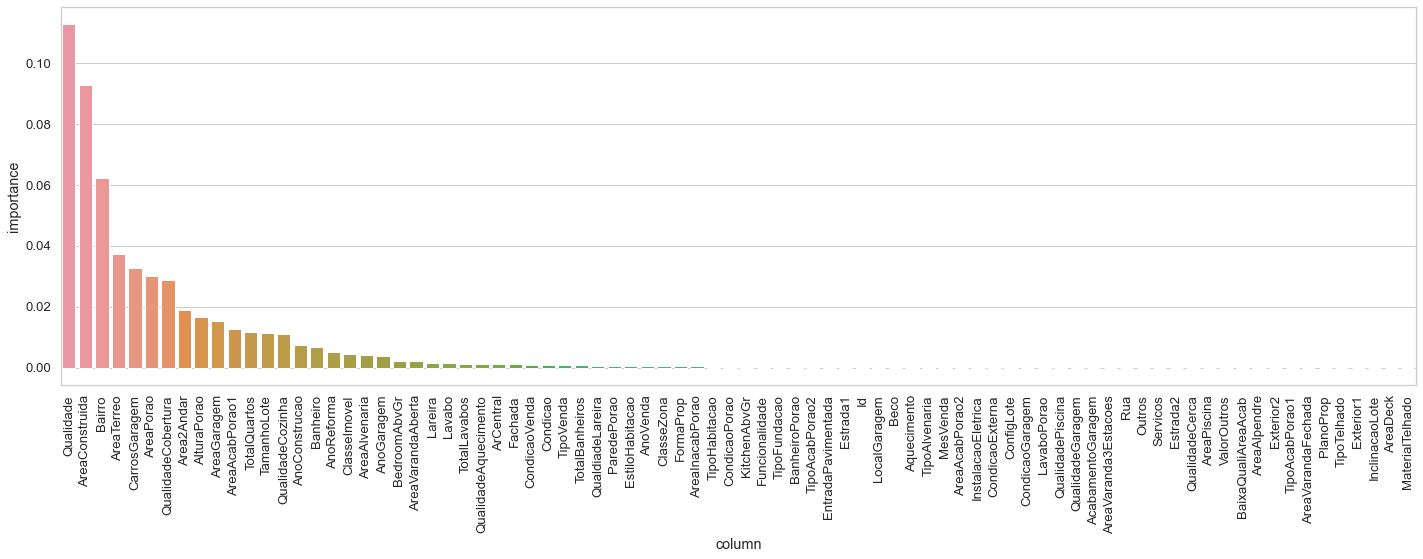

In [526]:
importances = pd.DataFrame({'column' : X_val.columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

In [527]:
# Pegando as top 20 melhores variáveis
best_features = importances.head(20).column.tolist()
print(best_features)

['Qualidade', 'AreaConstruida', 'Bairro', 'AreaTerreo', 'CarrosGaragem', 'AreaPorao', 'QualidadeCobertura', 'Area2Andar', 'AlturaPorao', 'AreaGaragem', 'AreaAcabPorao1', 'TotalQuartos', 'TamanhoLote', 'QualidadeCozinha', 'AnoConstrucao', 'Banheiro', 'AnoReforma', 'ClasseImovel', 'AreaAlvenaria', 'AnoGaragem']


In [528]:
#Retreinando o RandomForest apenas com as top 20 variáveis mais importantes

In [529]:
# Fitting the final RandomForest model
rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train[best_features], y_train)

# Computing predictions
y_train_pred = rf_model.predict(X_train[best_features])
y_val_pred = rf_model.predict(X_val[best_features])
y_test_pred = rf_model.predict(X_test[best_features])

# Computing the train, validation and test model performance metrics
train_report = metrics_report(y_train, y_train_pred, 'train')
val_report = metrics_report(y_val, y_val_pred, 'validation')
test_report = metrics_report(y_test, y_test_pred, 'test')

final_report = pd.concat([train_report, val_report[['validation']],  test_report[['test']]], axis=1)

print(f'Baseline report (total features: {len(features)})')
print(baseline_report)
print('')
print(f'Final report (total features: {len(best_features)})')
print(final_report)

Baseline report (total features: 82)
            metric  validation
0             RMSE    28356.73
1              MAE    16653.54
2              R^2        0.89
3             MAPE        0.09
4      Avg. target   174313.75
5  Avg. Prediction   171532.78

Final report (total features: 20)
            metric      train  validation       test
0             RMSE   11299.86    26567.07   22953.02
1              MAE    6502.42    16132.26   15082.14
2              R^2       0.98        0.91       0.92
3             MAPE       0.04        0.09       0.10
4      Avg. target  181312.69   174313.75  185701.65
5  Avg. Prediction  181157.49   172317.87  185571.62


In [530]:
#Computanto a importancia das features do modelo final no dataset de test (held-out testing set)

Running permutation feature importance with the final model on the held-out testing set


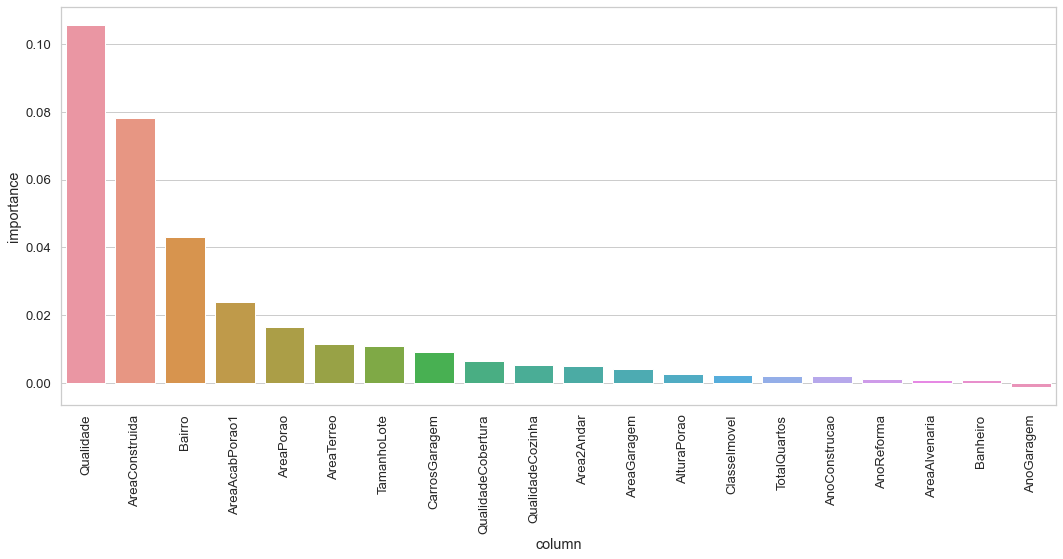

In [531]:
print('Running permutation feature importance with the final model on the held-out testing set')
permutation_result = permutation_importance(rf_model, X_test[best_features], y_test, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_test[best_features].columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()